## Data Analysis Of Restaurents 2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Data Loading/ Importing

In [3]:
df = pd.read_csv('D:\\Cognifyz Tech\\Restaurent_Dataset.csv')

In [4]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


2. Data Cleaning and Handling the missing values.

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.shape

(9542, 21)

## Level 1 

In [9]:
top_cuisines = df['Cuisines'].value_counts().head(3)
print("Top 3 most Cuisines:")
print(top_cuisines)

Top 3 most Cuisines:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [10]:
total_restaurents = len(df)
percentage_cuisines = (top_cuisines / total_restaurents) * 100
print("\nPercentage of Restaurants Serving Each Top Cuisine: ")
print(round(percentage_cuisines,2))


Percentage of Restaurants Serving Each Top Cuisine: 
Cuisines
North Indian             9.81
North Indian, Chinese    5.36
Chinese                  3.71
Name: count, dtype: float64


In [11]:
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
print("City with the heighest number of restaurents:" , top_city)
print("\nNumber of restaurents in each city: ")
print(city_counts.head())

City with the heighest number of restaurents: New Delhi

Number of restaurents in each city: 
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


In [12]:
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values()
print("\nAverage rating for each City: ")
print(round(avg_rating_per_city,2))


Average rating for each City: 
City
Faridabad           1.87
Noida               2.04
Mc Millan           2.40
Montville           2.40
New Delhi           2.44
                    ... 
Mandaluyong City    4.62
Pasig City          4.63
Makati City         4.65
Quezon City         4.80
Inner City          4.90
Name: Aggregate rating, Length: 140, dtype: float64


In [13]:
top_rated_city = avg_rating_per_city.idxmax()
top_rated_value = avg_rating_per_city.max()
print(f"\nCity with the highest rating: {top_rated_city} ({round(top_rated_value, 2)})")


City with the highest rating: Inner City (4.9)


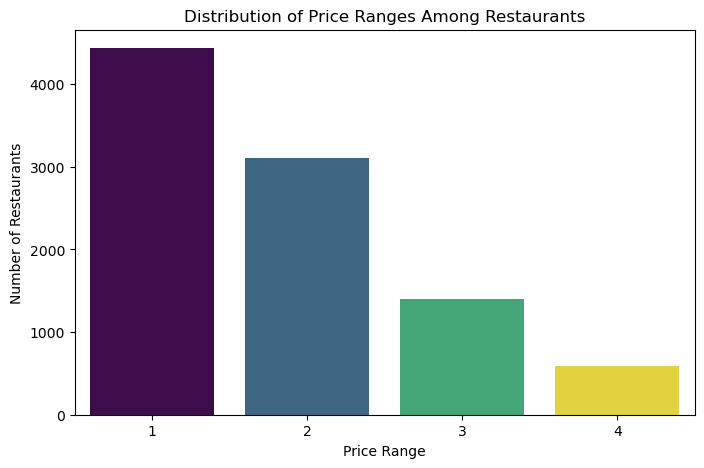

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Price range', hue='Price range', data=df, palette='viridis', legend=False)
plt.title("Distribution of Price Ranges Among Restaurants")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()


In [15]:
price_counts = df['Price range'].value_counts()
price_percentage = (price_counts / len(df)) * 100
print("\nPercentage of Restaurants in Each Price Range:")
print(round(price_percentage, 2))


Percentage of Restaurants in Each Price Range:
Price range
1    46.51
2    32.62
3    14.72
4     6.14
Name: count, dtype: float64


In [16]:
online_counts = df['Has Online delivery'].value_counts() 
total_restaurants = len(df)
percentage_online = (online_counts / total_restaurants) * 100
print("\nPercentage of Restaurants offering Online Delivery:")
print(round(percentage_online, 2))


Percentage of Restaurants offering Online Delivery:
Has Online delivery
No     74.31
Yes    25.69
Name: count, dtype: float64


In [17]:
avg_rating_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print('\nAverage Ratings Based on Online Delivery Availability:')
print(round(avg_rating_comparison, 2))


Average Ratings Based on Online Delivery Availability:
Has Online delivery
No     2.46
Yes    3.25
Name: Aggregate rating, dtype: float64


## Level 2

In [18]:
# check for missing values
df = df.dropna(subset=['Aggregate rating', 'Votes'])

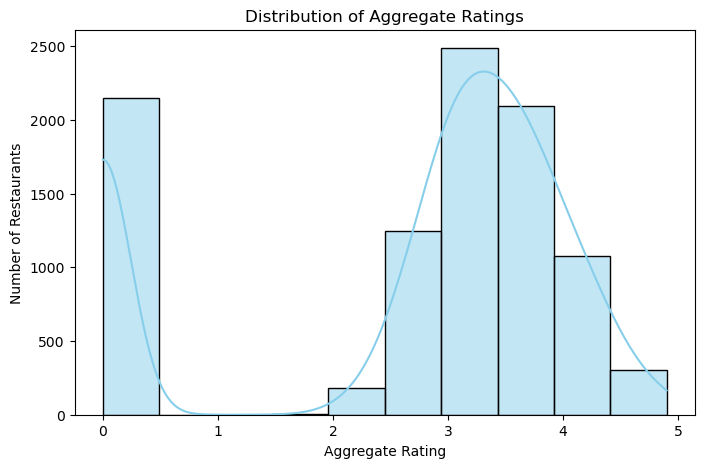

In [19]:
# Analyze the distribution of aggregate ratings and determine the most common rating range.
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()

In [20]:
# Calculate the average number of votes received by restaurants.
rating_bins = pd.cut(df['Aggregate rating'], bins =[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])
common_range = rating_bins.value_counts().idxmax()
print(" Most common Rating Range: ", common_range) 

 Most common Rating Range:  3-4


In [21]:
# Calculate the average number of votes received by restaurants
avg_votes = df['Votes'].mean()
print("✅ Average Number of Votes per Restaurant:", round(avg_votes, 2))

✅ Average Number of Votes per Restaurant: 156.77


In [22]:
# Clean and standardize the cuisine names
df['Cuisines'] = df['Cuisines'].str.strip().str.title()

In [23]:
#  Identify the most common combinations of cuisines
cuisine_combinations = df['Cuisines'].value_counts().head(10)
print("Top 10 most Common Cuisine Combinations:")
print(cuisine_combinations)

Top 10 most Common Cuisine Combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


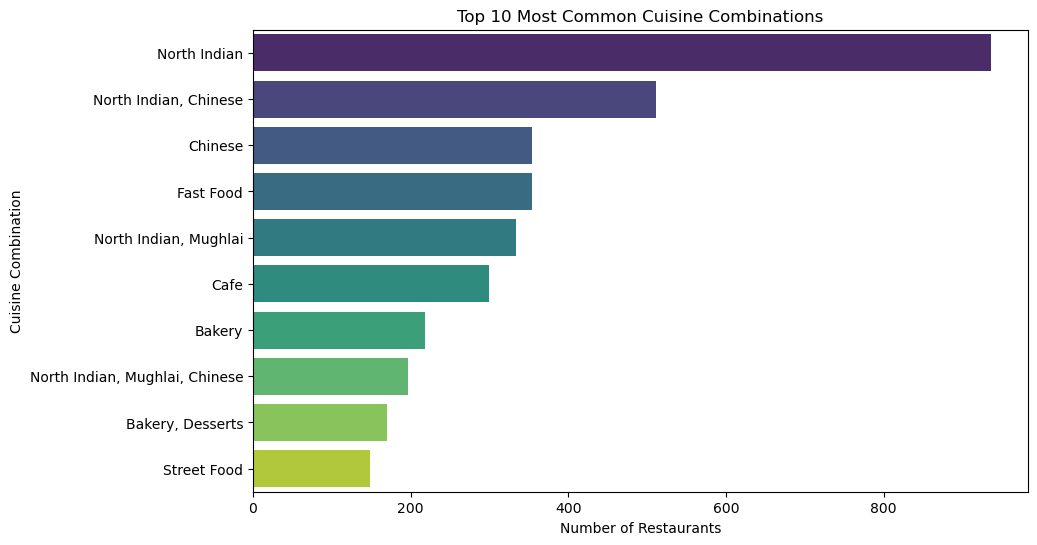

In [24]:
# Visualize the most common cuisine combinations
plt.figure(figsize=(10,6))
sns.barplot(y=cuisine_combinations.index, x=cuisine_combinations.values, hue=cuisine_combinations.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.legend([],[], frameon=False) 
plt.show()

In [25]:
# Determine if certain cuisine combinations tend to have higher ratings.
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cuisine Combinations by Average Rating:")
print(round(avg_rating_by_cuisine,2))


Top 10 Cuisine Combinations by Average Rating:
Cuisines
Italian, Deli               4.9
American, Bbq, Sandwich     4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
American, Coffee And Tea    4.9
Sunda, Indonesian           4.9
American, Burger, Grill     4.9
Name: Aggregate rating, dtype: float64


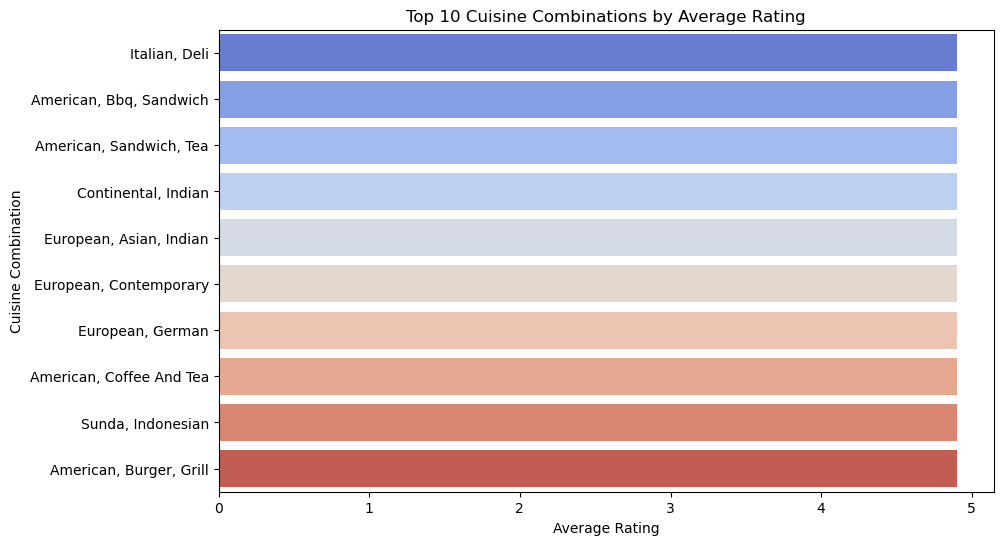

In [26]:
# Visualize cuisine combinations with highest average ratings.
plt.figure(figsize=(10,6))
sns.barplot(y=avg_rating_by_cuisine.index, x=avg_rating_by_cuisine.values, hue=avg_rating_by_cuisine.index, palette="coolwarm", dodge=False, legend=False)
plt.title("Top 10 Cuisine Combinations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.legend([], [], frameon=False)  
plt.show()

In [27]:
# Plot the locations of restaurants on a map using longitude and latitude coordinates.
# Basic check of data
print(df[['Restaurant Name', 'City', 'Latitude', 'Longitude']].head())

          Restaurant Name              City   Latitude   Longitude
0        Le Petit Souffle       Makati City  14.565443  121.027535
1        Izakaya Kikufuji       Makati City  14.553708  121.014101
2  Heat - Edsa Shangri-La  Mandaluyong City  14.581404  121.056831
3                    Ooma  Mandaluyong City  14.585318  121.056475
4             Sambo Kojin  Mandaluyong City  14.584450  121.057508


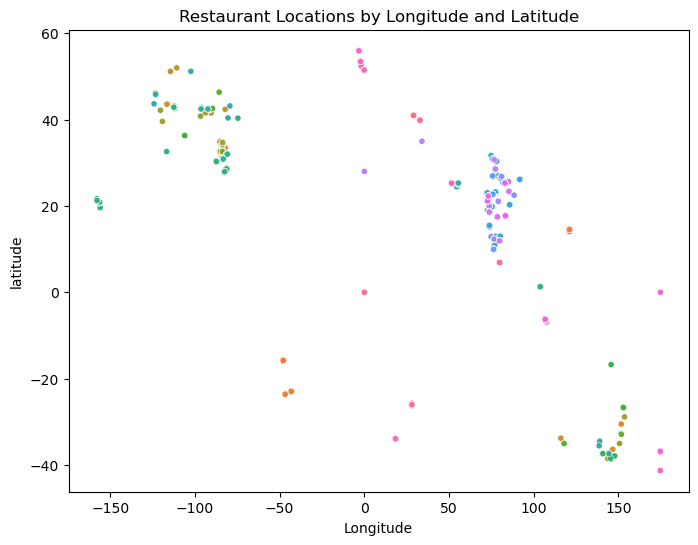

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='City', legend =False, s=20)
plt.title("Restaurant Locations by Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("latitude")
plt.show()

In [29]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [30]:
import folium
from folium.plugins import HeatMap

In [68]:
# Add heatmap to show restaurant density (clusters)
center_lat = df['Latitude'].mean()
center_long = df['Longitude'].mean()

heatmap_data = df[['Latitude', 'Longitude']].values.tolist()

m_heat = folium.Map(location=[center_lat, center_long], zoom_start=11, tiles='CartoDB positron')
HeatMap(heatmap_data, radius=10, blur=15).add_to(m_heat)

m_heat.save("restaurant_heatmap.html")
print("Heatmap saved as 'restaurant_heatmap.html' — open it in your browser to view dense restaurant clusters.")

Heatmap saved as 'restaurant_heatmap.html' — open it in your browser to view dense restaurant clusters.


In [32]:
# Identify if there are any restaurant chains present in the dataset.
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1] 
print("Number of Restaurant Chains Found:" , len(restaurant_chains))

Number of Restaurant Chains Found: 734


In [33]:
# Filter only restaurant chains
chain_df = df[df['Restaurant Name'].isin(restaurant_chains.index)]

In [34]:
# Analyze average rating and votes (popularity) for each chain.
chain_analysis = (
    chain_df.groupby('Restaurant Name')
    .agg(
        Locations=('City', 'nunique'),
        Avg_Rating=('Aggregate rating', 'mean'),
        Total_Votes=('Votes', 'sum'),
        Avg_cost=('Average Cost for two', 'mean')
    )
    .sort_values(by='Total_Votes', ascending=False)
    .head(10)
)
print("\nTop 10 Restaurant Chains by Popularity (Votes):")
print(round(chain_analysis,2))


Top 10 Restaurant Chains by Popularity (Votes):
                           Locations  Avg_Rating  Total_Votes  Avg_cost
Restaurant Name                                                        
Barbeque Nation                   22        4.35        28142   1498.08
AB's - Absolute Barbecues          3        4.82        13400   1500.00
Big Chill                          1        4.47        10853   1500.00
Farzi Cafe                         6        4.37        10098   1516.67
Truffles                           2        3.95         9682    550.00
Chili's                            4        4.58         8156   1700.00
Joey's Pizza                       1        4.25         7807    800.00
Big Yellow Door                    1        4.27         7511    600.00
Saravana Bhavan                    1        4.13         7238    500.00
Starbucks                          4        3.81         7139    662.78


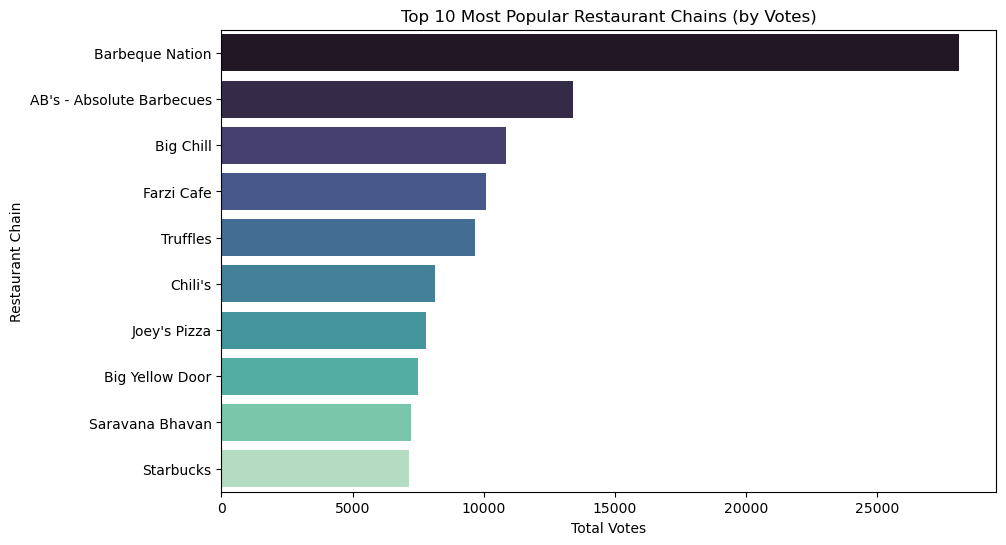

In [35]:
# Visualization — Top 10 Chains by Votes
plt.figure(figsize=(10,6))
sns.barplot(
    x=chain_analysis['Total_Votes'],
    y=chain_analysis.index,
    hue=chain_analysis.index,
    palette="mako",
    dodge=False,
    legend=False
)
plt.title("Top 10 Most Popular Restaurant Chains (by Votes)")
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.legend([], [], frameon=False) 
plt.show()


## Level 3

In [36]:
# Analyze the text reviews to identify the most common positive and negative keywords.
# Calculate review length
df['Review_Length'] = df['Rating text'].apply(lambda x: len(x.split()))

In [37]:
# Sentiment analysis using TextBlob
# TextBlob is a Python library designed for processing textual data with a simple and consistent API that makes common 
# natural language processing (NLP) tasks easy to perform.

!pip install -U textblob
!python -m textblob.download_corpora

Defaulting to user installation because normal site-packages is not writeable
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Gayatri\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gayatri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gayatri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Gayatri\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Gayatri\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Gayatri\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_re

In [38]:
df.columns = df.columns.str.strip()

In [39]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Review_Length'],
      dtype='object')

In [40]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['Sentiment'] = df['Rating text'].apply(get_sentiment)


In [41]:
df['Sentiment_Label'] = df['Sentiment'].apply(
    lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral')
)

In [42]:
# Importing some more extra libraries for analysis/
import re
from collections import Counter

In [43]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [44]:
# Analyze the text reviews to identify the most common positive and negative keywords.

# Clean column names (remove whitespace)
df.columns = df.columns.str.strip()

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment polarity to reviews
df['Sentiment'] = df['Rating text'].apply(get_sentiment)

# Find common positive and negative keywords
# Tokenize, remove stopwords (optional), and separate by sentiment

# Simple stopword list
stopwords = set([
    'the', 'and', 'is', 'in', 'it', 'of', 'to', 'a', 'was', 'for', 'on', 'with', 
    'as', 'at', 'this', 'that', 'but', 'be', 'not', 'are', 'have', 'had', 'so', 'if',
])

positive_texts = df[df['Sentiment'] > 0]['Rating text'].str.lower().str.cat(sep=' ')
negative_texts = df[df['Sentiment'] < 0]['Rating text'].str.lower().str.cat(sep=' ')

def get_top_keywords(text, stopwords, n=20):
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [word for word in words if word not in stopwords]
    return Counter(filtered_words).most_common(n)

top_positive_keywords = get_top_keywords(positive_texts, stopwords)
top_negative_keywords = get_top_keywords(negative_texts, stopwords)

print("Top Positive Keywords:")
for word, count in top_positive_keywords:
    print(f"{word}: {count}")

print("\nTop Negative Keywords:")
for word, count in top_negative_keywords:
    print(f"{word}: {count}")

Top Positive Keywords:
good: 3174
very: 1078
excellent: 300

Top Negative Keywords:
average: 3734
poor: 186


In [45]:
# Calculate the average length of reviews and explore if there is a relationship between review length and rating.
# Calculate review length (number of words)
df['Review_Length'] = df['Rating text'].apply(lambda x: len(str(x).split()))

# Average review length
avg_length = df['Review_Length'].mean()
print(f"Average review length (words): {avg_length:.2f}")


Average review length (words): 1.34


In [46]:
print(df['Rating text'].dtype)
print(df['Rating text'].unique())
print(df['Rating text'].isnull().sum())


object
['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']
0


In [47]:
df_clean = df.dropna(subset=['Rating text', 'Review_Length'])


In [48]:
df_clean['Rating text'] = df_clean['Rating text'].astype(str)  # convert to string categories


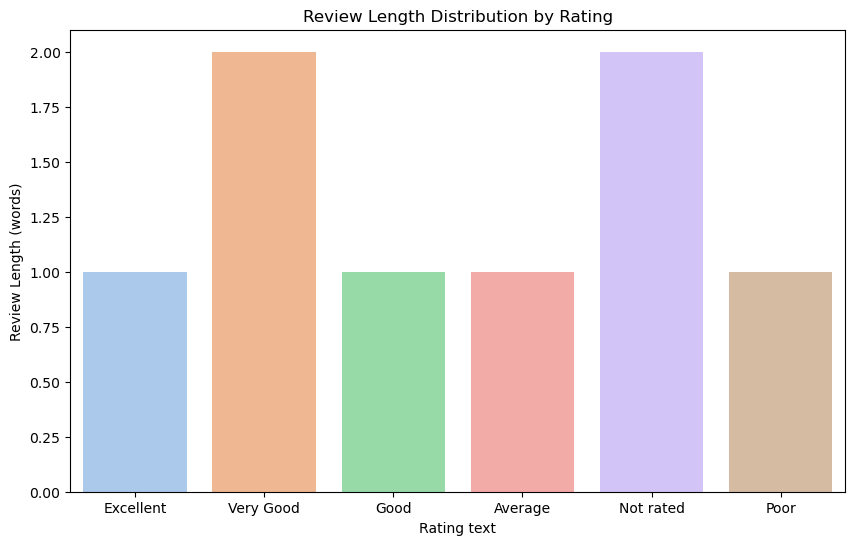

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Rating text',
    y='Review_Length',
    data=df_clean,
    hue='Rating text',      # assign hue same as x
    palette='pastel',
    dodge=False,
    legend=False            # disable legend for same effect as before
)
plt.title('Review Length Distribution by Rating')
plt.xlabel('Rating text')
plt.ylabel('Review Length (words)')
plt.legend([], [], frameon=False)  # hides legend if shown
plt.show()


In [50]:
df = df.dropna(subset=['Votes', 'Aggregate rating'])

In [51]:
# Identify the restaurants with the highest and lowest number of votes.
# Convert Votes to numeric (in case it's stored as text)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Step 3: Identify restaurants with the highest and lowest votes
highest_votes = df.loc[df['Votes'].idxmax(), ['Restaurant Name', 'City', 'Votes', 'Aggregate rating']]
lowest_votes = df.loc[df['Votes'].idxmin(), ['Restaurant Name', 'City', 'Votes', 'Aggregate rating']]

print("Restaurant with Highest Votes:")
print(highest_votes)
print("\nRestaurant with Lowest Votes:")
print(lowest_votes)

Restaurant with Highest Votes:
Restaurant Name          Toit
City                Bangalore
Votes                   10934
Aggregate rating          4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
Restaurant Name     Cantinho da Gula
City                      S��o Paulo
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object



 Correlation between Votes and Aggregate Rating: 0.31


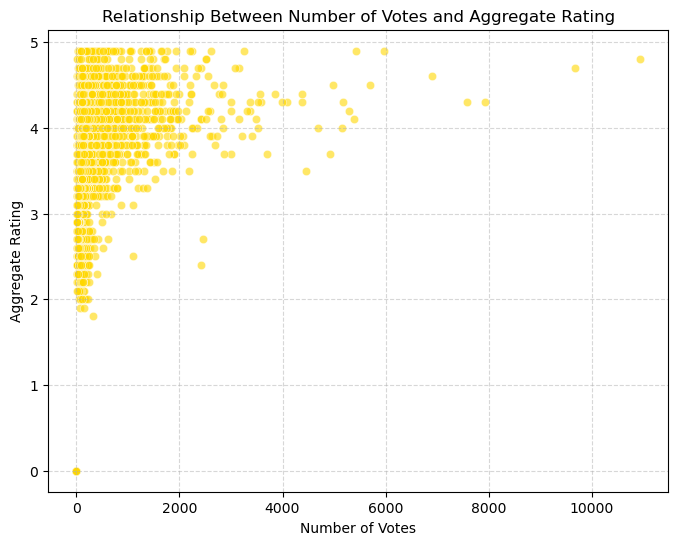

In [52]:
# Analyze if there is a correlation between the number of votes and the rating of a restaurant.
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\n Correlation between Votes and Aggregate Rating: {correlation:.2f}")

# Step 5: Visualize the relationship between Votes and Ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6, color='#FFD700')  
plt.title('Relationship Between Number of Votes and Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [53]:
# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
# Convert columns to proper data types
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.strip().str.lower()
df['Has Table booking'] = df['Has Table booking'].astype(str).str.strip().str.lower()

In [54]:
# Step 3: Create summary tables
# Percentage of restaurants offering online delivery & table booking by price range
delivery_summary = (
    df.groupby('Price range')['Has Online delivery']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Online Delivery %')
)

booking_summary = (
    df.groupby('Price range')['Has Table booking']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Table Booking %')
)


In [55]:
# Merge both summaries
summary = pd.merge(delivery_summary, booking_summary, on='Price range')
print("Percentage of Restaurants Offering Online Delivery & Table Booking by Price Range:")
print(summary)

Percentage of Restaurants Offering Online Delivery & Table Booking by Price Range:
   Price range  Online Delivery %  Table Booking %
0            1          15.795403         0.022533
1            2          41.310633         7.677482
2            3          29.252669        45.836299
3            4           9.044369        46.757679


In [ ]:
# Visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=summary, x='Price range', y='Online Delivery %', marker='o', label='Online Delivery')
sns.lineplot(data=summary, x='Price range', y='Table Booking %', marker='o', label='Table Booking')
plt.title("Price Range vs Online Delivery & Table Booking Availability")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Offering Service (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [56]:
# Calculate percentages by price range
online_delivery_summary = (
    df.groupby('Price range')['Has Online delivery']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Online Delivery %')
)

table_booking_summary = (
    df.groupby('Price range')['Has Table booking']
    .apply(lambda x: (x == 'yes').mean() * 100)
    .reset_index(name='Table Booking %')
)


In [57]:
# Merge both summaries into one table
summary = pd.merge(online_delivery_summary, table_booking_summary, on='Price range')

print(" Percentage of Restaurants Offering Online Delivery & Table Booking by Price Range:\n")
print(summary)

 Percentage of Restaurants Offering Online Delivery & Table Booking by Price Range:

   Price range  Online Delivery %  Table Booking %
0            1          15.795403         0.022533
1            2          41.310633         7.677482
2            3          29.252669        45.836299
3            4           9.044369        46.757679


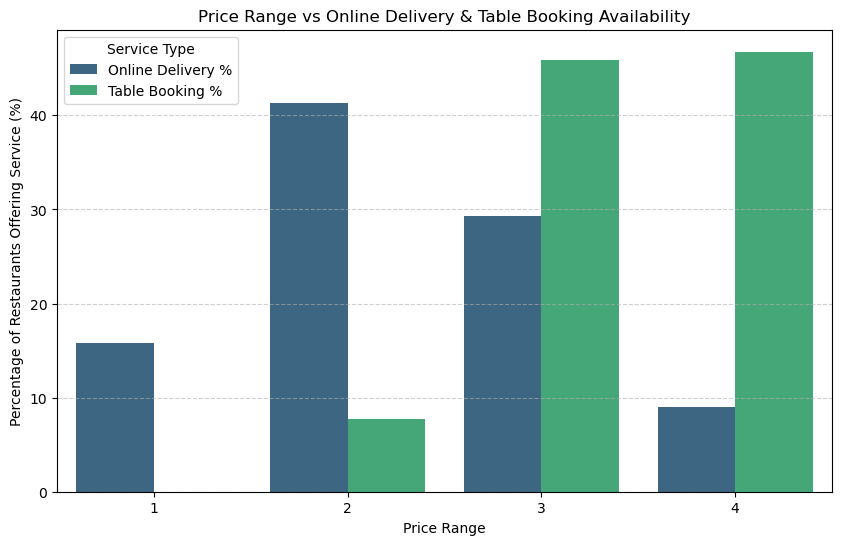

In [58]:
# Step 5: Visualization - Side-by-side bar chart
plt.figure(figsize=(10,6))
summary_melted = summary.melt(id_vars='Price range', 
                              value_vars=['Online Delivery %', 'Table Booking %'],
                              var_name='Service Type', 
                              value_name='Percentage')

sns.barplot(data=summary_melted, x='Price range', y='Percentage', hue='Service Type', palette='viridis')
plt.title("Price Range vs Online Delivery & Table Booking Availability")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Offering Service (%)")
plt.legend(title='Service Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [59]:
# Step 6: Correlation Analysis
# Encode categorical yes/no as 1/0 for correlation
df['OnlineDelivery_Binary'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})
df['TableBooking_Binary'] = df['Has Table booking'].map({'yes': 1, 'no': 0})

corr_delivery = df['Price range'].corr(df['OnlineDelivery_Binary'])
corr_booking = df['Price range'].corr(df['TableBooking_Binary'])

print(f"\nCorrelation between Price Range and Online Delivery: {corr_delivery:.2f}")
print(f"Correlation between Price Range and Table Booking: {corr_booking:.2f}")


Correlation between Price Range and Online Delivery: 0.08
Correlation between Price Range and Table Booking: 0.50


In [60]:
# Determine if higher-priced restaurants are more likely to offer these services.

In [61]:
# Clean and prepare data
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.lower().str.strip()
df['Has Table booking'] = df['Has Table booking'].astype(str).str.lower().str.strip()

In [62]:
# Keep only rows with valid yes/no and price values
df = df[df['Has Online delivery'].isin(['yes', 'no'])]
df = df[df['Has Table booking'].isin(['yes', 'no'])]
df.dropna(subset=['Price range'], inplace=True)

In [63]:
# Encode categorical yes/no as binary
df['OnlineDelivery_Binary'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})
df['TableBooking_Binary'] = df['Has Table booking'].map({'yes': 1, 'no': 0})

In [64]:
# Correlation check
corr_delivery = df['Price range'].corr(df['OnlineDelivery_Binary'])
corr_booking = df['Price range'].corr(df['TableBooking_Binary'])

print("CORRELATION RESULTS:")
print(f"Correlation between Price Range and Online Delivery: {corr_delivery:.2f}")
print(f"Correlation between Price Range and Table Booking: {corr_booking:.2f}")

CORRELATION RESULTS:
Correlation between Price Range and Online Delivery: 0.08
Correlation between Price Range and Table Booking: 0.50


In [65]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [67]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table for Price range vs Has Table booking
contingency_booking = pd.crosstab(df['Price range'], df['Has Table booking'])

# Perform Chi-square test
chi2_booking, p_booking, dof_booking, exp_booking = chi2_contingency(contingency_booking)

print("\nCHI-SQUARE TEST RESULTS:")
print(f"Table Booking  - Chi2: {chi2_booking:.2f}, p-value: {p_booking:.4f}")

# Assuming you also have contingency and stats for online delivery (chi2_delivery, p_delivery)
# Print if available
try:
    print(f"Online Delivery - Chi2: {chi2_delivery:.2f}, p-value: {p_delivery:.4f}")
except NameError:
    pass  



CHI-SQUARE TEST RESULTS:
Table Booking  - Chi2: 2823.95, p-value: 0.0000
